In [107]:
import pandas as pd
from scipy.stats import mannwhitneyu, ttest_ind, kstest
import matplotlib.pyplot as plt




In [108]:
df = pd.read_csv('AB_Test_Results-_2_.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [110]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [111]:
new_df = df[df['REVENUE']>0]
new_df

,USER_ID,VARIANT_NAME,REVENUE
13,2529,variant,2.15
49,6429,control,3.25
139,3331,variant,4.27
149,8110,variant,1.75
152,8607,control,2.99
...,...,...,...
9651,9928,variant,1.25
9711,6468,control,2.93
9724,5205,control,14.17
9725,702,variant,2.92


In [112]:
new_df[df['VARIANT_NAME']=='variant'].describe()

,USER_ID,REVENUE
count,72.000000,72.000000
mean,5306.958333,4.881528
std,3116.544256,9.913973
min,56.000000,0.020000
25%,2707.500000,1.245000
50%,5721.000000,2.170000
75%,7963.750000,3.972500
max,9996.000000,58.630000


In [113]:
new_df[df['VARIANT_NAME']=='control'].describe()

,USER_ID,REVENUE
count,80.000000,80.000000
mean,4461.950000,8.037500
std,2826.386242,22.498124
min,124.000000,0.020000
25%,2037.500000,1.515000
50%,4327.000000,2.960000
75%,6636.750000,6.657500
max,9766.000000,196.010000


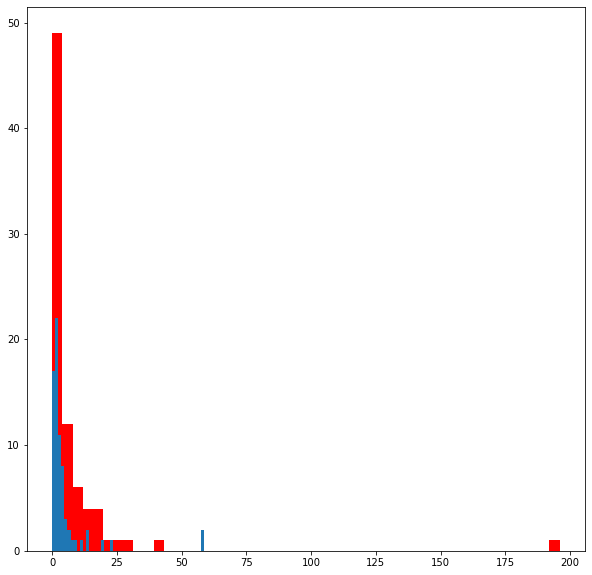

In [114]:
data = new_df
plt.figure(figsize=(10, 10))
control_all = data['REVENUE'][data['VARIANT_NAME'] == 'control']
test_all =data['REVENUE'][data['VARIANT_NAME'] == 'variant']


plt.hist(control_all, color='r', bins=50)
plt.hist(test_all,  bins=50)


plt.show()

In [115]:
df.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [116]:
new_df.VARIANT_NAME.value_counts()

control    80
variant    72
Name: VARIANT_NAME, dtype: int64

In [117]:
df.USER_ID.nunique()

6324

In [118]:
new_df.USER_ID.nunique()

150

In [119]:
ttest_ind(control_all, test_all, equal_var = False)

Ttest_indResult(statistic=1.1379124979933528, pvalue=0.25760685398932337)

pvalue > 0.05 -> Значимых различий нет

In [120]:
# Проверка на нормальность тест Колмогорова-Смирнова
print(kstest(control_all, 'norm'))
print(kstest(test_all, 'norm'))

KstestResult(statistic=0.7443502263331446, pvalue=3.4769340937348253e-46)
KstestResult(statistic=0.6885669682907651, pvalue=1.5788521734348758e-34)


pvalue < 0.05 -> Распределение не нормальное

In [121]:
# Расчет стат значимости Манна Уитни
mannwhitneyu(control_all, test_all)

MannwhitneyuResult(statistic=2404.0, pvalue=0.039621499053015305)

pvalue > 0.05 -> Значимых различий нет

Нулевую гипотезу не отвергаем.